# Volume estimates plotter
This Jupyter Notebook plots the volume estimates appearing in the poster.

These volume estimates use the following function:

**Definition.** For $d>0$ and $s\geq 0$, $$v_s = \operatorname{vol}\left\lbrace (x_1,\dots,x_d)\in [0,1]^d:\sum_{i=1}^d x_i\leq s\right\rbrace.$$

**Theorem.** According to Aberbach and Enescu (Section 3 of [AE12]),
$$
v_s = \sum_{n=0}^{\lfloor s\rfloor} (-1)^n \frac{(s-n)^d}{n!(d-n)!}
$$

In [ ]:
def v(d,s):
    return sum((-1)^n*(s-n)^d/(factorial(n)*factorial(d-n)) for n in range(floor(s)+1))

## Dimension 4: Watanabe and Yoshida's volume estimate (2005)
Watanabe and Yoshida prove the following theorem:

**Theorem.** Let $(A,\mathfrak{m},k)$ be an unmixed local ring of characteristic
$p > 0$. Put $d= \dim A ≥ 1$. Let $J$ be a minimal reduction of $\mathfrak{m}$, and let $r$
be an integer with $r ≥ µ_A(\mathfrak{m}/J^∗)$, where $J^∗$ denotes the tight closure of $J$.
Also, let $s ≥ 1$ be a rational number. Then we have
$$
e_\text{HK}(A) \geq e(A)\left(v_s -r\cdot \frac{(s-1)^d}{d!}\right).
$$

The following cell shows values of Watanabe and Yoshida's volume estimates in dimension 4, and why $s=2$ is just fine, if you compare it with the line that represents the Hilbert–Kunz multiplicity of $R_{3,4}$

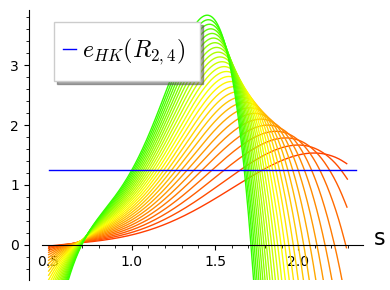

In [3]:
d = 4 # dimension
e = 4 # multiplicity
lb = eHKA1(2,d) # the lower bound that the volume estimates need to surpass
a = 20 # number of points (precision)
r = e-1 # parameter
rg0,rg1 = 0.5,2.35 # range of plot
e1,e2=4,31
#e*(v(d,s)-r*(s-1)^d/factorial(d)),float(7/3)
p = sum(plot(spline([(s/a,e0*(v(d,s/a)-(e0-1)*(s/a-1)^d/factorial(d))) for s in range(floor(a*rg0),ceil(a*rg1))]),(rg0,rg1),rgbcolor=hue(0.01*e0),ymin=-0.5) for e0 in range(e1,e2))+line([(rg0,lb),(rg1,lb)],color='blue',legend_label='$e_{HK}(R_{2,%d})$'%d)#,title="Volume estimates in dimension %d, $4\leq e(R)\leq 137$"%d)
p.save('dimension_%d.png'%d,legend_font_size='xx-large',figsize=4,axes_labels=['s',''])
show(p,legend_font_size='xx-large',figsize=4,axes_labels=['s',''])

In [4]:
# x   = SR.var('x')
# x0  = 0
# threshold = line([(rg0,4/3),(rg1,4/3)])
# set_verbose(-1)
# @interact
# def _(e0=slider([4 .. 30])):
#   ft = spline([(s/a,e0*(v(d,s/a)-(e0-1)*(s/a-1)^d/factorial(d))) for s in range(floor(a*rg0),ceil(a*rg1))])
#   pt = plot(ft, -1, 5, color=colors[e0%8], thickness=2)
#   #pretty_print(html(r'$f(x)\;=\;%s$' % latex(f)))
#   #pretty_print(html(r'$\hat{f}(x;%s)\;=\;%s+\mathcal{O}(x^{%s})$' % (x0, latex(ft), order+1)))
#   show(threshold+pt, ymin=-.5, ymax=2.5)

## Dimensions 5 and 6: Aberbach and Enescu's volume estimates (2012)

**Theorem.** ...

The following cell shows how in dimension 6, the Hilbert–Kunz multiplicity of the $A_1$ and $A_2$ singularities in characteristic 2 are well below Aberbach and Enescu's volume estimates. However, the bounds they give are not always sharp, and they fall short for the value in characteristic 2.

The function max_G(e) is a function that to each $e$ and dimension $d$ associates the best volume estimate (up to a certain precision granted by the parameter $a$).

In [5]:
def G(e,d): # See definition in Aberbach and Enescu's 2012 paper.
    '''
    This function takes the G(e) values and computes an approximate maximum.
    a is simply a subdivision of the interval of values. Increase to get
    ever more precise values.
    '''
    a = 15
    l = [(s/a,e*(v(d,s/a)-(e-2)*v(d,s/a-1))) for s in range(0,a*6)]
    return spline(l)

In [ ]:
d = 5
lb = eHKA1(2,d)
rg0,rg1 = 0.5,3.5
e1,e2 = 4,137
#show(points([max_G(e,d) for e in range(5,30)],color='red')+line([(0,lb),(30,lb)],color='green')+line([(0,17/15),(30,17/15)],color='blue'))
p = sum(plot(G(e0,d),(rg0,rg1),rgbcolor=hue(0.4/137*e0),ymin=-0.5) for e0 in range(e1,e2,2))+line([(rg0,lb),(rg1,lb)],color='blue',legend_label='$e_{HK}(R_{2,%d})$'%d)#,title="Volume estimates in dimension %d, $4\leq e(R)\leq 137$"%d)
p.save('dimension_%d.png'%d,legend_font_size='xx-large',figsize=4,axes_labels=['s',''])
show(p,legend_font_size='xx-large',figsize=4,axes_labels=['s',''])

In [22]:
d = 6
rg0,rg1 = 0.5,3.5
lb = eHKA1(2,d)
#points([max_G(e,d) for e in range(5,30)],color='red')+line([(0,1.125),(30,1.125)],color='green')+line([(0,17/15),(30,17/15)],color='blue')
p = sum(plot(G(e0,d),(rg0,rg1),rgbcolor=hue(0.4/810*e0),ymin=-0.5) for e0 in range(4,16,4))+sum(plot(G(e0,d),(rg0,rg1),rgbcolor=hue(0.4/810*e0),ymin=-0.5) for e0 in range(16,810,8))+line([(rg0,lb),(rg1,lb)],color='blue',legend_label='$e_{HK}(R_{2,%d})$'%d)
p.save('dimension_%d.png'%d,legend_font_size='xx-large',figsize=4,axes_labels=['s',''])

The cell below is the plot of the volume estime given by Aberbach–Enescu, 2012, as a function on $s$ for the case of dimension 7 and multiplicity 6, and the line representing the value of the Hilbert–Kunz multiplicity of the quadric of dimension 7 and characteristic 2. It is not enough for us: as you can see, for every $s$, the volume estimate is smaller than the value we want it to exceed... And even if you compare it with that value but for characteristic 3, the volume estimate is still short! That is why Aberbach and Cox-Steib did new things.

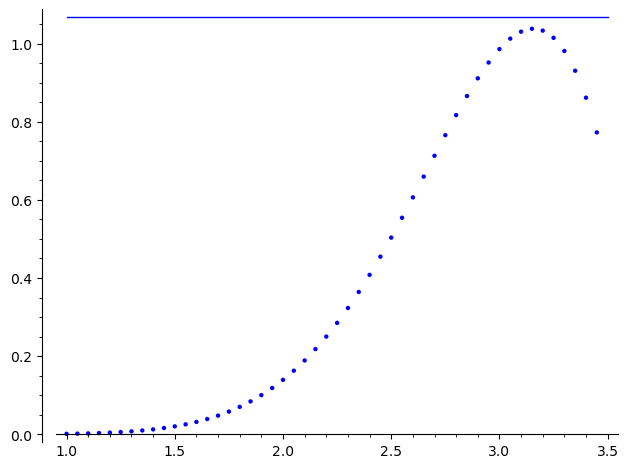

In [7]:
d = 7
e = 6
a = 20
point([(s/a,e*(v(d,s/a)-(e-2)*v(d,s/a-1))) for s in range(20,70)])+line([(1,16/15),(3.5,16/15)])

# It does not work in dimension 6.


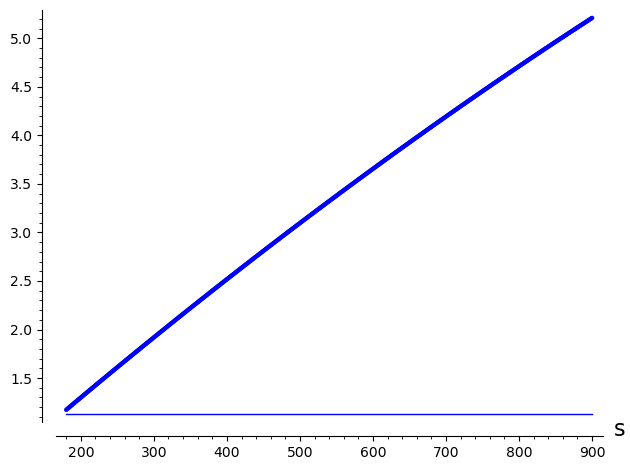

In [20]:
a = 10
e0 = 5
r0 = e0-2
rg = 4
s0 = 1.3 # If you put s0 = 1.3, then for 180≤e≤900, the volume estimate is over eHK(R_{2,6})
a = 180
b = 900
# points([(s/a,e0*(v(7,s/a)-r0*v(7,s/a-1))) for s in range(rg*a)])+line([(0,16/15),(rg,16/15)])+line([(s0,0),(s0,16/15)])
points([(e,-e^2*v(6,s0-1)+(v(6,s0)+2*v(6,s0-1))*e) for e in range(a,b+1)],axes_labels=['s',''])+line([(a,1.125),(b,1.125)])

# Aberbach and Cox-Steib improved volume estimate (2023)
**Definition.** They use the function $H(d,e,s,t)$, which is defined as: ...

In [9]:
def H(d,e,s,t):
    '''
    0≤t≤1 and s≥0
    This function takes mu = e-2 automatically, as Aberbach and Cox-Steib suggest. All the values of the function
    increase when mu is smaller, and e-2 is the maximal possible value for mu, but since mu has to be greater
    than µ(...), we need to take mu = e-2 so that it works as a general lower bound.
    '''
    mu = e-2
    return 1-t/2+e*(v(d,s)-(e-4)*v(d,s-1)-v(d,s-1/2)-v(d,s-t))

In [10]:

d = 7
a = 60 #This number is to add points
m = 3 #this number is to exaggerate the z axis
e = 6
t0 = 0
t1 = 1
s0 = 2
s1 = 3
var('x y z')
p = list_plot3d([(i/a,j/a,m*max([1,H(d,e,i/a,j/a)])) for i in range(s0*a,s1*a) for j in range(t0*a,t1*a)],size=1,color='yellow')+implicit_plot3d(z==m*eHKA1(2,d),(x,s0,s1),(y,t0,t1),(z,m*0.9,m*1.2),color='blue',opacity=0.5,legend_label='$e_{HK}(R_{2,%d})$'%d)#+implicit_plot3d(z==m*16/15,(x,s0,s1),(y,t0,t1),(z,m*0.9,m*1.2),color='red',opacity=0.8)
#p.save('dimension_%d.png'%d,legend_font_size='xx-large',figsize=14)

In [11]:
#list_plot3d([(i/a,j/a,H(d,e,i/a,j/a)) for i in range(s0*a,s1*a) for j in range(t0*a,t1*a)])+point(max([(i/a,j/a,H(d,e,i/a,j/a)) for i in range(s0*a,s1*a) for j in range(t0*a,t1*a)],key = lambda x: x[2]))

In [12]:
#points([max([(i/a,j/a,H(d,e,i/a,j/a)) for i in range(s0*a,s1*a) for j in range(t0*a,t1*a)],key = lambda x: x[2]) for e in range(6,40)],size=1,color='red')+implicit_plot3d(z==eHKA1(2,d),(x,s0,s1),(y,t0,t1),(z,0.9,1.2),color='blue',opacity=0.5,legend_label='$e_{HK}(R_{2,%d})$'%d)

In [21]:
d = 7
a = 60 #This number is to add points
m = 3 #this number is to exaggerate the z axis
t0 = 0
t1 = 1
s0 = 2
s1 = 3
p = points([max([(e,H(d,e,i/a,j/a)) for i in range(s0*a,s1*a) for j in range(t0*a,t1*a)],key = lambda x: x[1]) for e in range(6,11)],color='red',size=15,axes_labels=['e',''])+points([max([(e,H(d,e,i/a,j/a)) for i in range(s0*a,s1*a) for j in range(t0*a,t1*a)],key = lambda x: x[1]) for e in range(11,20)],color='green',size=15)+line([(5,eHKA1(2,d)),(20,eHKA1(2,d))],color='blue',legend_label='$e_{HK}(R_{2,%d})$'%d)+line([(5,eHKA1(3,d)),(20,eHKA1(3,d))],color='green',legend_label='$e_{HK}(R_{3,%d})$'%d)
p.save('dimension_%d.png'%d,legend_font_size='xx-large',figsize=4)